In [49]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm
from astropy.coordinates import solar_system_ephemeris, get_body, get_sun
from astropy.time import Time, TimeDelta

from zodipy import tabulate_density

In [2]:
N = 200
x = np.linspace(-5, 5, N)  # x-plane
y = np.linspace(-5, 5, N)  # y-plane
z = np.linspace(-2, 2, N)  # z-plane

In [8]:
grid = np.asarray(np.meshgrid(x, y, z))
density_grid = tabulate_density(grid, model="dirbe")
density_grid = density_grid.sum(axis=0)  # Sum over all components

In [84]:
start_time = Time("2022-09-22 23:22")
dt = TimeDelta(15, format="jd")
time_range = start_time + dt * np.arange(0, 365//15+1)

earth_location = np.stack([-get_sun(t).cartesian.xyz.to('AU') for t in time_range])

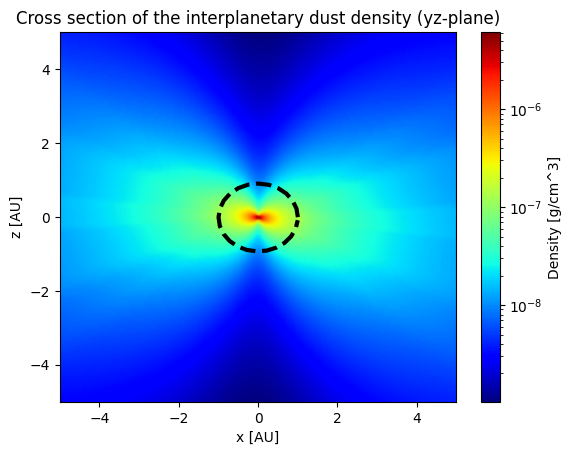

In [88]:
plt.pcolormesh(
    x,
    y,
    density_grid[N // 2].T,  # cross section in the yz-plane
    cmap="jet",
    norm=LogNorm(vmin=density_grid.min(), vmax=density_grid.max()),
    shading="gouraud",
    rasterized=True,
)
plt.plot(earth_location[:, 0], earth_location[:, 1], "k--", lw=3)
cbar = plt.colorbar()
cbar.set_label("Density [g/cm^3]")
plt.title("Cross section of the interplanetary dust density (yz-plane)")
plt.xlabel("x [AU]")
plt.ylabel("z [AU]")
plt.show()

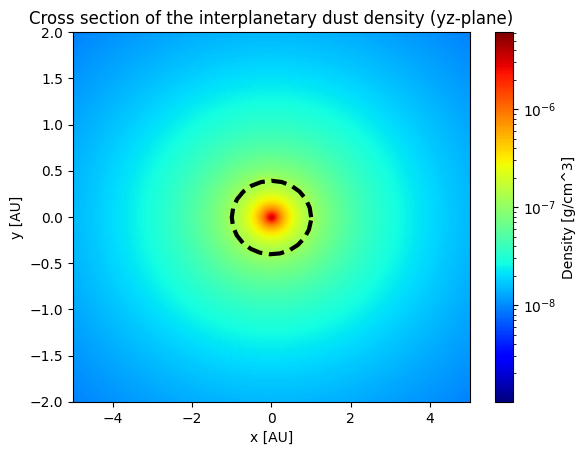

In [86]:
plt.pcolormesh(
    y,
    z,
    density_grid[:, :, N // 2].T,  # cross section in the yz-plane
    cmap="jet",
    norm=LogNorm(vmin=density_grid.min(), vmax=density_grid.max()),
    shading="gouraud",
    rasterized=True,
)
plt.plot(earth_location[:,0], earth_location[:, 2], "k--", lw=3)
cbar = plt.colorbar()
cbar.set_label("Density [g/cm^3]")
plt.title("Cross section of the interplanetary dust density (yz-plane)")
plt.xlabel("x [AU]")
plt.ylabel("y [AU]")
plt.show()